In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')# Reading data
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
df.isnull().sum()#check if the data is clean

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [4]:
df.duplicated().sum()#check if there's any duplication

18078

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()#check if there's any duplication

0

In [7]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [8]:
#EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [10]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


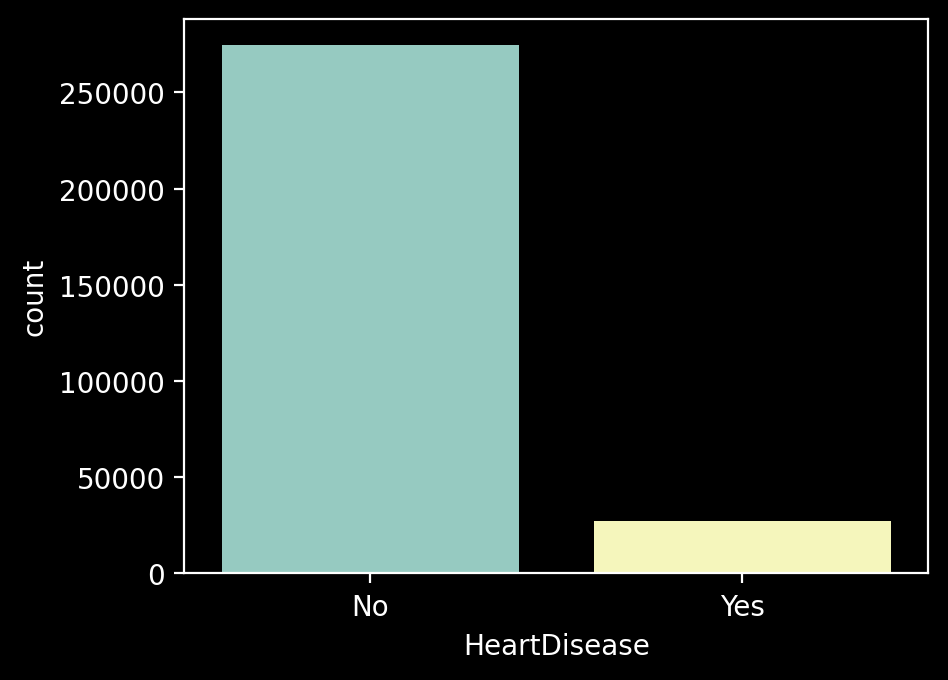

In [11]:
#display the target column
sns.countplot(data=df,x='HeartDisease');

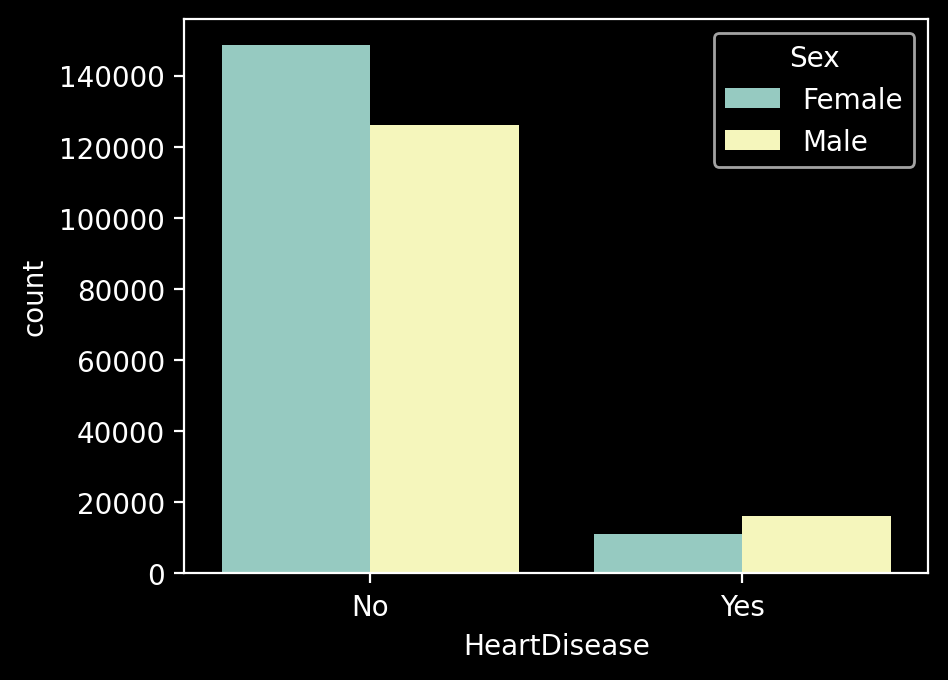

In [12]:
#display the target column with sex
sns.countplot(data=df,x='HeartDisease',hue='Sex');

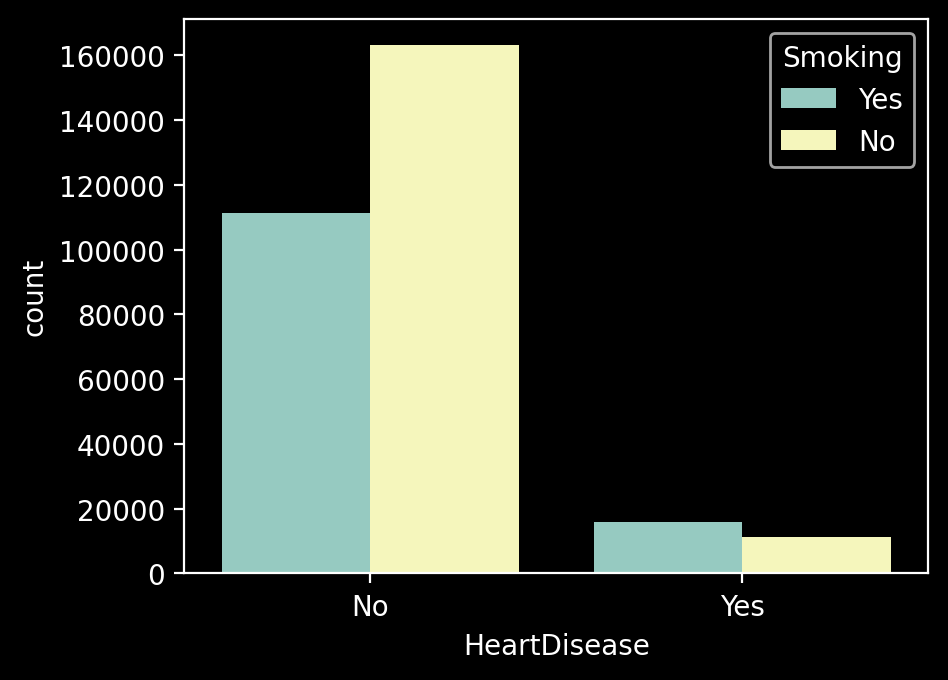

In [13]:
#display the target column with Smoking
sns.countplot(data=df,x='HeartDisease',hue='Smoking');

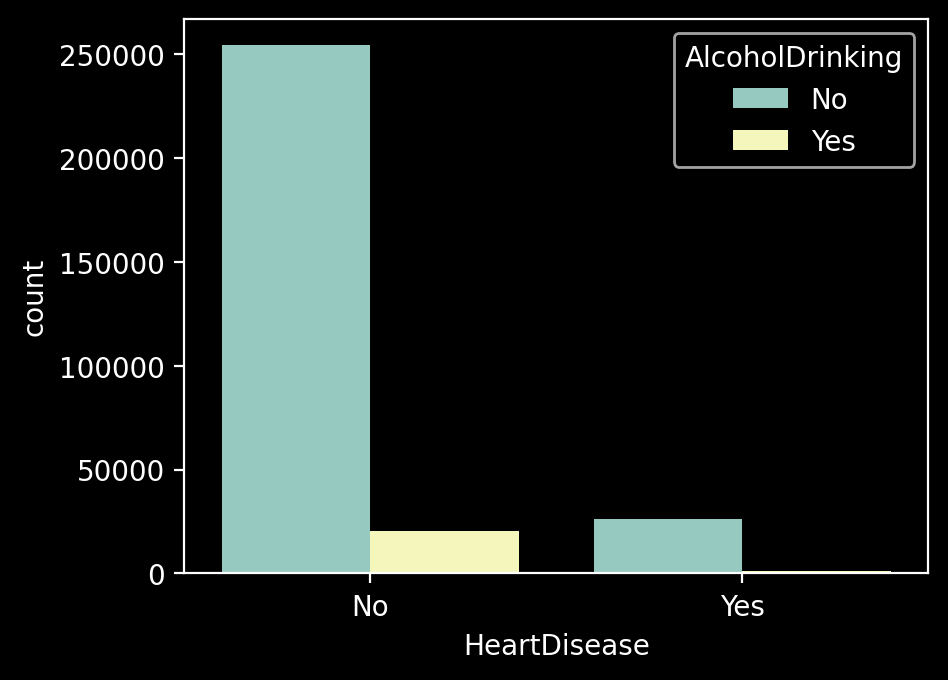

In [14]:
#display the target column with AlcoholDrinking
sns.countplot(data=df,x='HeartDisease',hue='AlcoholDrinking');

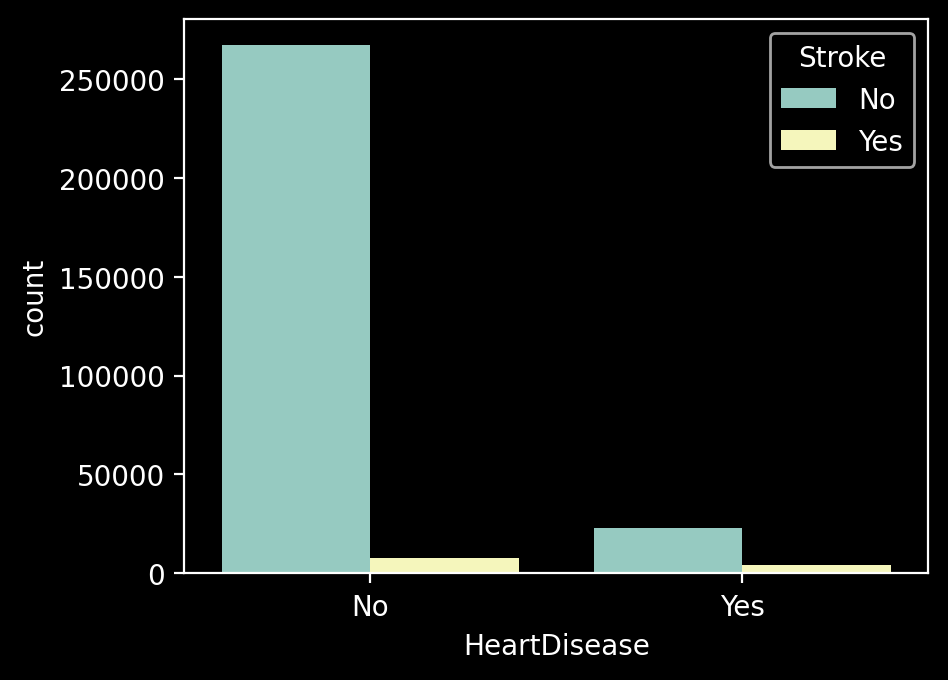

In [15]:
#display the target column with Stroke
sns.countplot(data=df,x='HeartDisease',hue='Stroke');

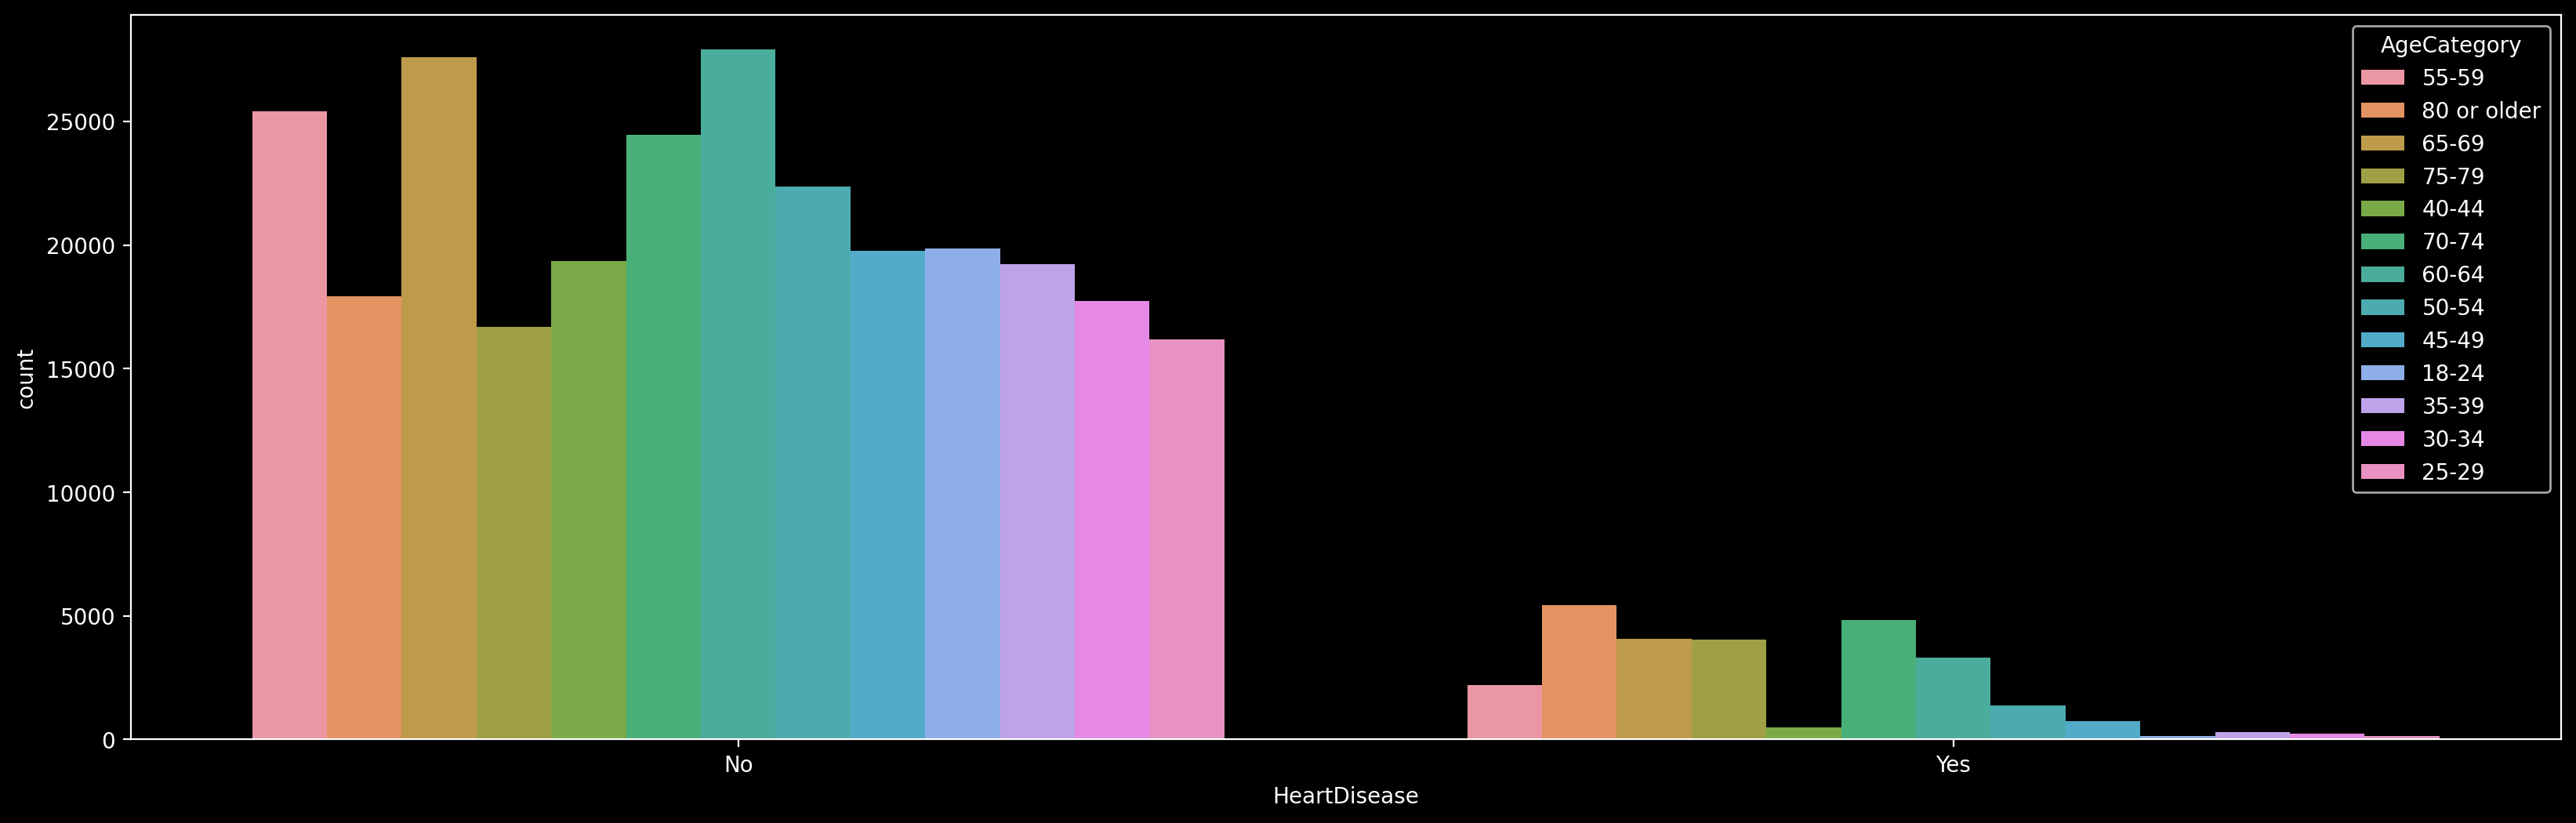

In [16]:
#display the target column with AgeCategory
plt.figure(figsize=(20,6))
sns.countplot(data=df,x='HeartDisease',hue='AgeCategory');

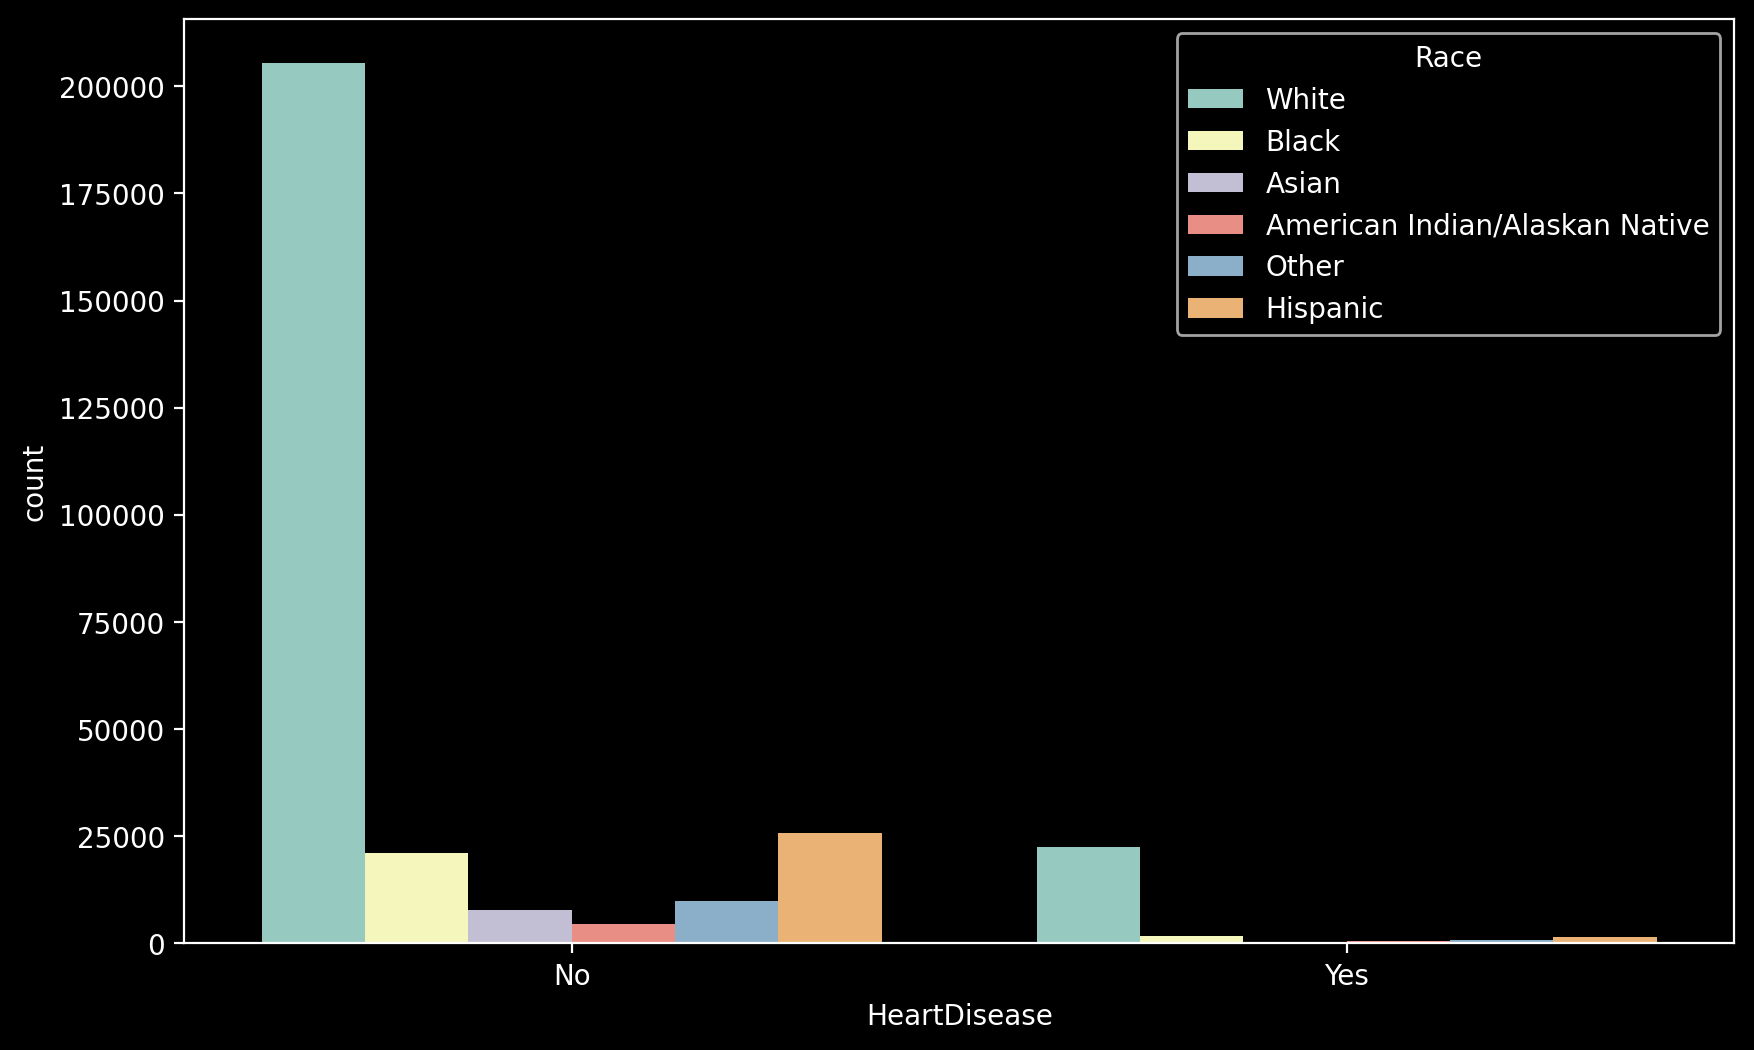

In [17]:
#display the target column with Race
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='HeartDisease',hue='Race');

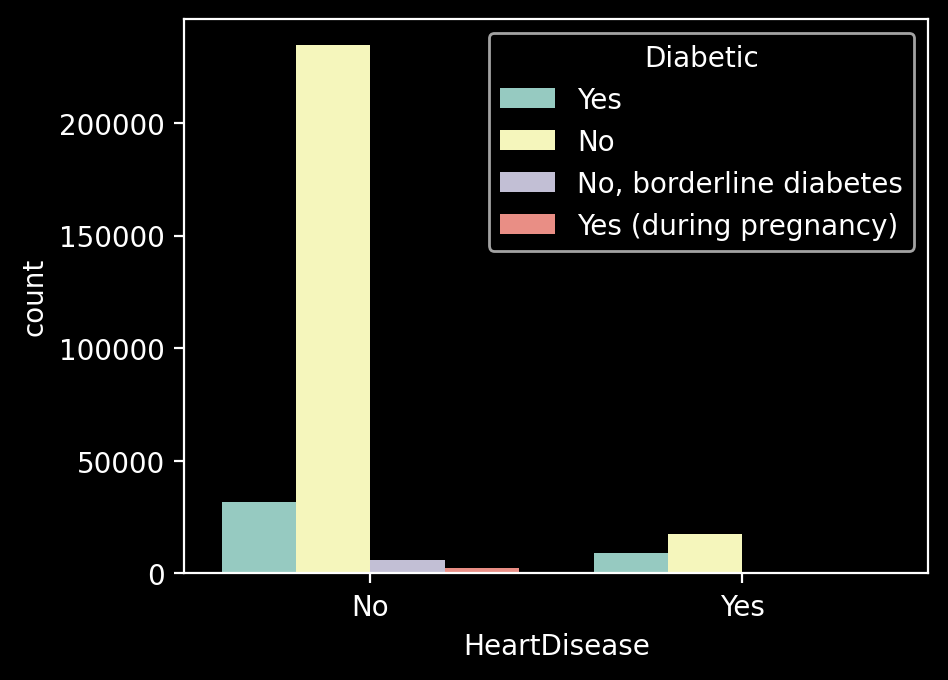

In [18]:
#display the target column with Diabetic
sns.countplot(data=df,x='HeartDisease',hue='Diabetic');

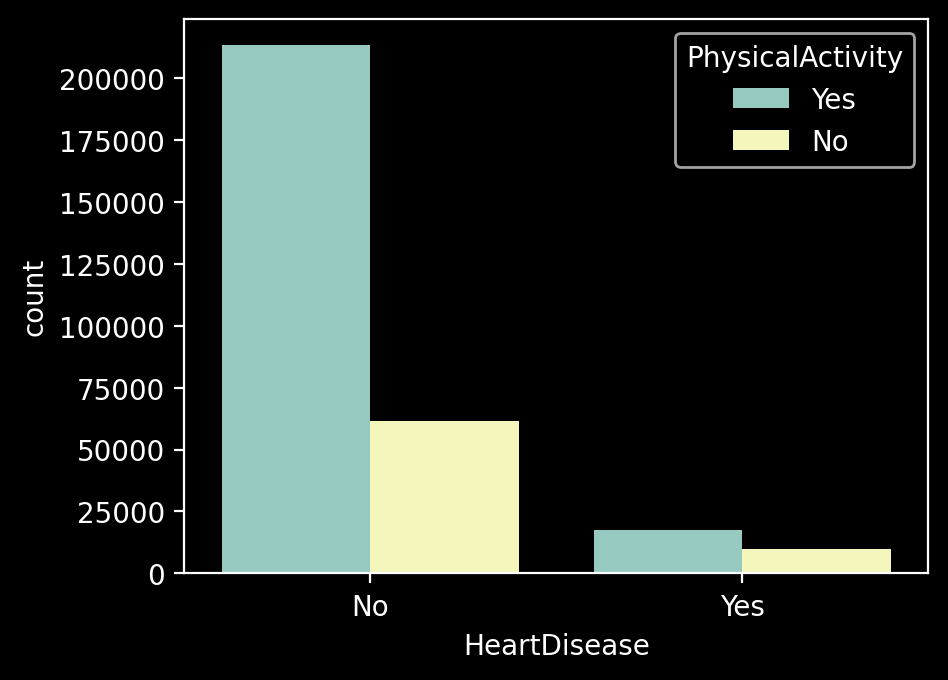

In [19]:
#display the target column with PhysicalActivity
sns.countplot(data=df,x='HeartDisease',hue='PhysicalActivity');

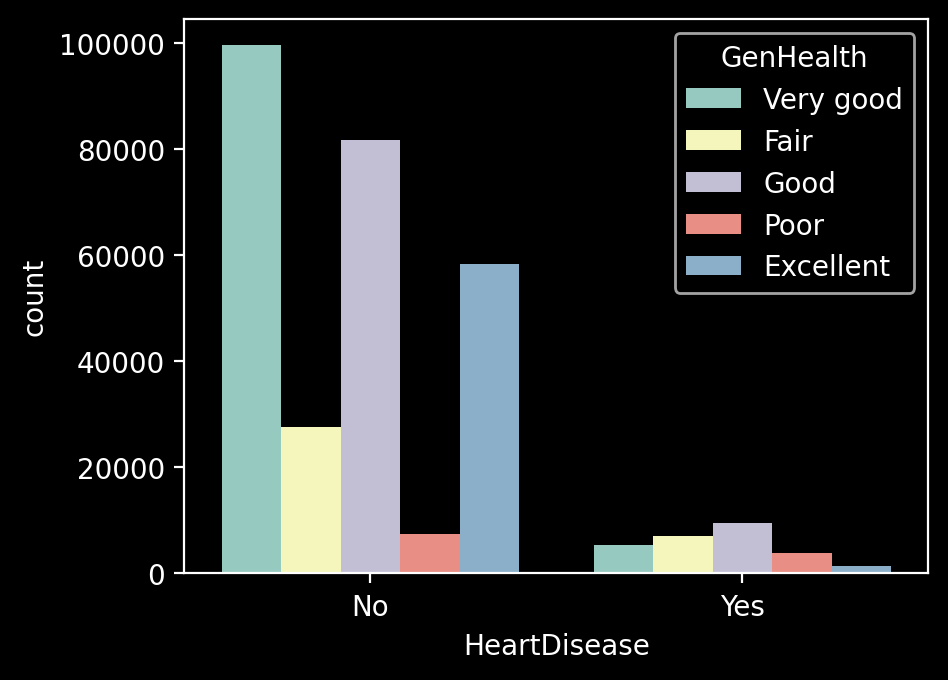

In [20]:
#display the target column with GenHealth
sns.countplot(data=df,x='HeartDisease',hue='GenHealth');

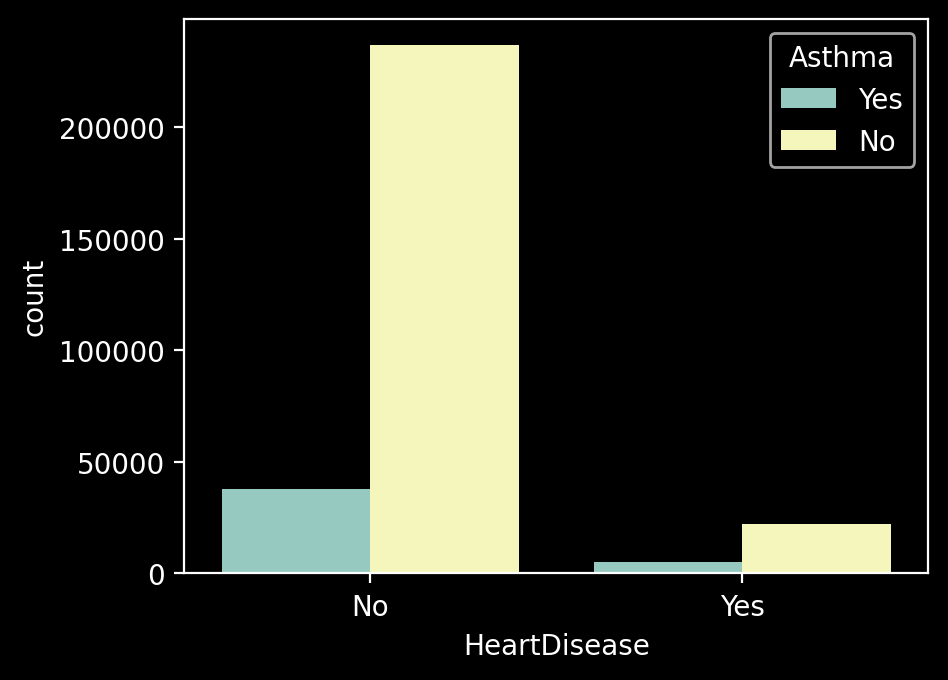

In [21]:
#display the target column with Asthma
sns.countplot(data=df,x='HeartDisease',hue='Asthma');

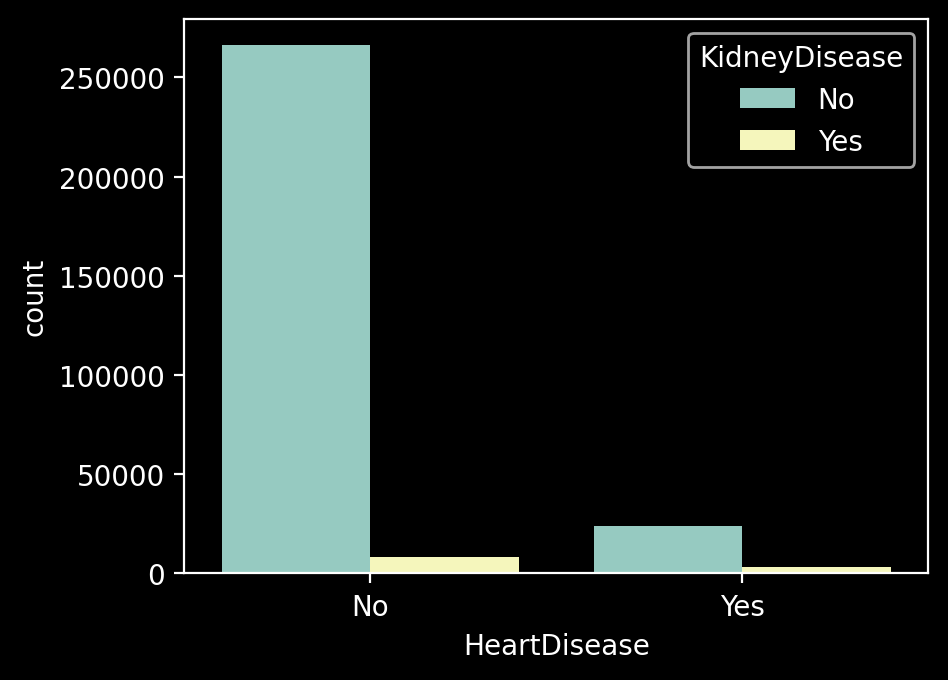

In [22]:
#display the target column with KidneyDisease
sns.countplot(data=df,x='HeartDisease',hue='KidneyDisease');

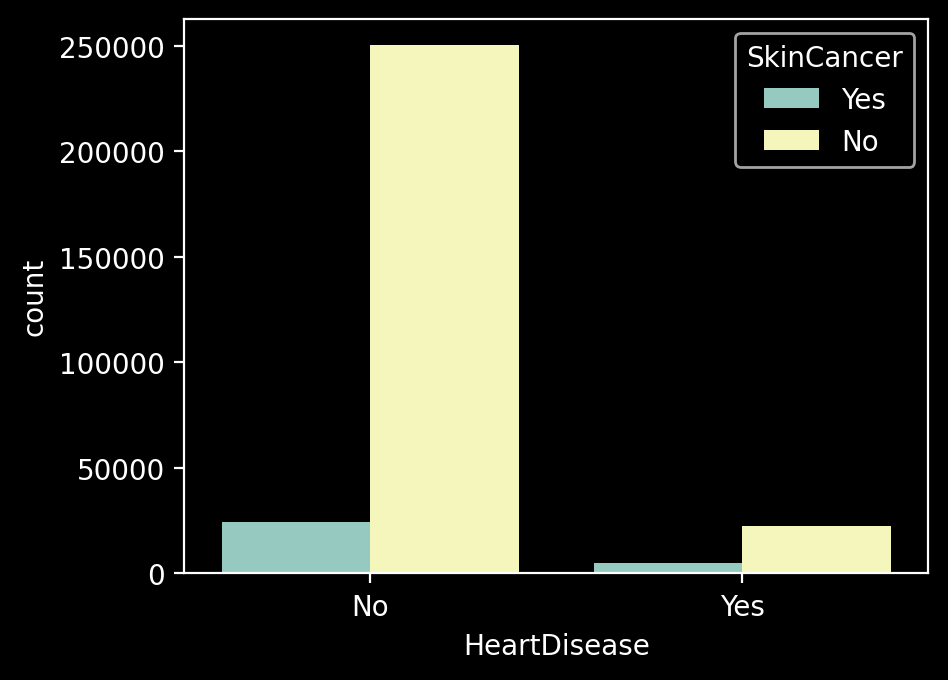

In [23]:
#display the target column with SkinCancer
sns.countplot(data=df,x='HeartDisease',hue='SkinCancer');

In [24]:
#decision three manually

In [25]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = np.sum([
        (-counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts))
        for i in range(len(elements))
    ])
    return entropy

In [26]:
def info_gain(data, split_attribute_name, target_name):
    total_entropy = entropy(data[target_name])
    
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)
    
    weighted_entropy = np.sum([
        (counts[i] / np.sum(counts)) * entropy(
            data[data[split_attribute_name] == vals[i]][target_name]
        )
        for i in range(len(vals))
    ])
    
    information_gain = total_entropy - weighted_entropy
    return information_gain

In [27]:
def id3(data, original_data, features, target_attribute_name, parent_node_class=None, n_features=None, remove_feature=True):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    elif len(data) == 0:
        return np.unique(original_data[target_attribute_name])[
            np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
        ]
    
    elif len(features) == 0:
        return parent_node_class
    
    else:
        parent_node_class = np.unique(data[target_attribute_name])[
            np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
        ]
        
        # Randomly select a subset of features
        features_subset = random.sample(features, min(n_features, len(features))) if n_features else features
        
        item_values = [
            info_gain(data, feature, target_attribute_name) for feature in features_subset
        ]
        
        best_feature_index = np.argmax(item_values)
        best_feature = features_subset[best_feature_index]
        
        tree = {best_feature: {}}
        
        # Remove the best feature if specified
        if remove_feature:
            features = [i for i in features if i != best_feature]
        
        for value in np.unique(data[best_feature]):
            sub_data = data[data[best_feature] == value]
            subtree = id3(sub_data, original_data, features, target_attribute_name, parent_node_class, n_features, remove_feature)
            
            tree[best_feature][value] = subtree
            
        return tree

In [28]:
def predict(query, tree, default='No'):
    for key in query.keys():
        if key in tree.keys():
            try:
                result = tree[key][query[key]]
            except KeyError:
                return default
            
            if isinstance(result, dict):
                return predict(query, result)
            else:
                return result

def classify(tree, df):
    queries = df.to_dict(orient='records')
    predicted = []
    for query in queries:
        predicted.append(predict(query, tree))
    return predicted

In [29]:
#Random forest manually

In [30]:
def RandomForest(data, features, target_attribute_name, n_trees=10, n_features=None, remove_feature=True):
    trees = []
    for _ in range(n_trees):
        bootstrap_data = bootstrap_samples(data)
        tree = id3(bootstrap_data, bootstrap_data, features, target_attribute_name, n_features=n_features, remove_feature=remove_feature)
        trees.append(tree)
    
    return trees

In [31]:
def majority_voting(test_data, trees):
    predictions = []
    for tree in trees:
        predictions.append(classify(tree, test_data))
    trees_preds = np.swapaxes(predictions, 0, 1)
    majority = most_common(trees_preds)
    
    return majority

In [32]:
def most_common(preds):
    predictions = []
    for pred in preds:
        predictions.append(np.unique(pred)[np.argmax(np.unique(pred, return_counts=True)[1])])
    
    return predictions

In [33]:
def bootstrap_samples(data):
    n_samples = data.shape[0]
    idxs = np.random.choice(n_samples, size=n_samples, replace=True)
    return data.iloc[idxs]

In [34]:
#Training and testing split

In [35]:
x = df
y = df
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)
x_train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
207506,No,32.49,No,No,No,0.0,4.0,No,Male,40-44,White,No,Yes,Excellent,8.0,No,No,No
59621,No,24.03,No,No,No,0.0,4.0,No,Female,45-49,Black,No,Yes,Good,8.0,No,No,No
128373,No,39.05,No,Yes,No,0.0,2.0,No,Male,40-44,White,No,No,Very good,8.0,No,No,No
51630,No,26.18,Yes,No,No,0.0,0.0,No,Male,70-74,White,No,Yes,Excellent,8.0,No,No,No
240188,No,20.18,No,No,No,1.0,1.0,No,Female,75-79,White,No,Yes,Very good,10.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211825,No,16.49,Yes,No,No,0.0,0.0,No,Male,25-29,White,No,Yes,Excellent,6.0,No,No,No
287209,No,28.48,Yes,Yes,No,0.0,0.0,Yes,Male,25-29,White,No,Yes,Excellent,5.0,No,No,No
233923,No,24.33,No,No,No,0.0,1.0,No,Female,55-59,White,No,Yes,Very good,6.0,No,No,No
286727,No,27.44,No,No,No,0.0,0.0,No,Female,65-69,Black,No,Yes,Good,8.0,No,No,No


In [36]:
features = [i for i in df.columns]
features.remove('HeartDisease')
target = 'HeartDisease'
random_forest = RandomForest(x_train,features,target,n_features=6,n_trees=5)

In [37]:
predictions = majority_voting(test_data=y_test,trees=random_forest)
print(predictions)

['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',

In [38]:
predictions = pd.DataFrame(predictions,columns=['predictions'])
predictions

,predictions
0,No
1,No
2,No
3,No
4,No
...,...
60339,No
60340,No
60341,No
60342,No


In [39]:
predictions['Actual'] = np.array(y_test['HeartDisease'])
predictions

,predictions,Actual
0,No,No
1,No,No
2,No,No
3,No,No
4,No,Yes
...,...,...
60339,No,No
60340,No,No
60341,No,No
60342,No,No


<AxesSubplot:xlabel='predictions', ylabel='count'>

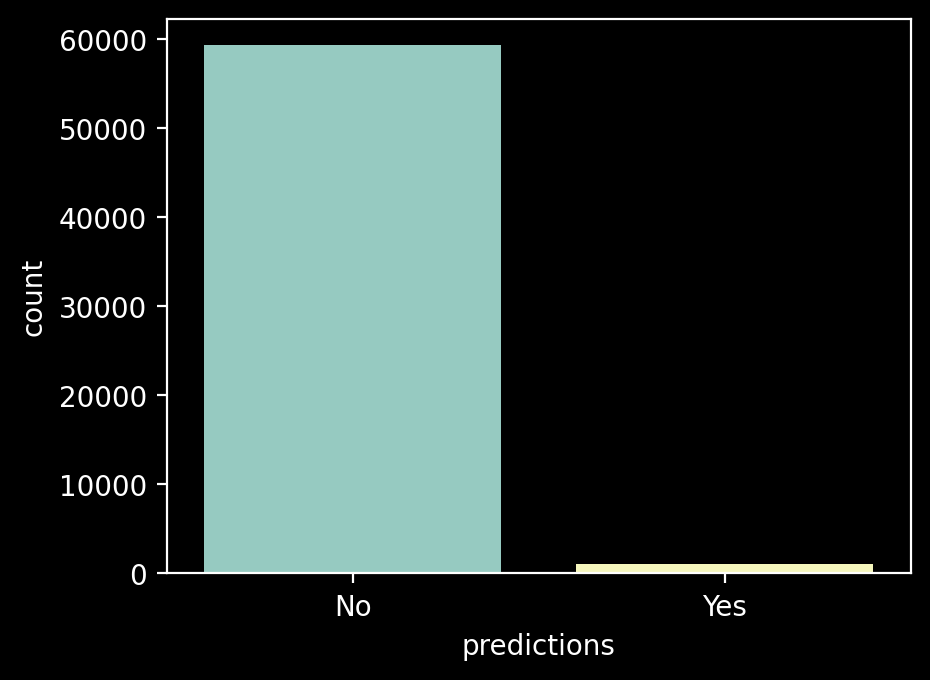

In [40]:
sns.countplot(data=predictions,x='predictions')

In [41]:
print('classification report for Random forest manually:')
print(classification_report(predictions['predictions'],predictions['Actual']))

classification report for Random forest manually:
              precision    recall  f1-score   support

          No       0.98      0.91      0.95     59260
         Yes       0.04      0.21      0.07      1084

    accuracy                           0.90     60344
   macro avg       0.51      0.56      0.51     60344
weighted avg       0.97      0.90      0.93     60344



In [42]:
#Random forest by scikit-learn

In [43]:
rf = RandomForestClassifier()

In [44]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [45]:
#LabelEncoder

In [46]:
le = LabelEncoder()

In [47]:
for i in ['Smoking','AlcoholDrinking','Stroke','Sex','AgeCategory','Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer','HeartDisease','DiffWalking']:
    le.fit(df[i]).classes_
    df[i] = le.transform(df[i])

In [48]:
x = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [50]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
predictions_by_scikit_learn = rf.predict(x_test)
predictions_by_scikit_learn

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
print('classification report for Random forest by scikit-learn:')
print(classification_report(predictions_by_scikit_learn,y_test))

classification report for Random forest by scikit-learn:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     58489
           1       0.11      0.32      0.16      1855

    accuracy                           0.90     60344
   macro avg       0.54      0.62      0.56     60344
weighted avg       0.95      0.90      0.92     60344

